### TRANSBORDER FREIGHT DATA ANALYSIS
---
The transborder freight industry plays a vital role in powering North America's economy by linking businesses and consumers across the U.S., Canada, and Mexico. However, it faces significant challenges such as congestion, escalating costs, and environmental concerns that hinder its efficiency. In this analysis, we applied the CRISP-DM framework — a widely used methodology for data mining, to transform raw data into meaningful insights and practical, sustainable recommendations.

### CRISP-DM Approach
CRISP-DM (Cross-Industry Standard Process for Data Mining) is a six-phase framework that guides data projects from raw data to actionable insights. Here’s how we applied each phase to tackle freight challenges:


### Business Understanding
Objective: Define goals and align analysis with stakeholder needs.
We started by clarifying the problem: optimizing freight efficiency, reducing costs, and improving sustainability. Key questions included identifying congestion hotspots, comparing freight charges, and evaluating environmental impact.

#### Analytical Questions to Address:
1.	What are the top commodities transported across U.S. borders by value and weight?
2.	How has the total trade value evolved from 2020 to 2024?
3.	Which mode of transportation dominates trade, and how has its share changed over time?
4.	What are the top trading partners (countries/provinces/states) and how have these changed year over year?
5.	Which U.S. ports (by state or code) handle the most freight, and what are the bottlenecks? 
6.	Is there any seasonal pattern in freight movement (e.g., more trade in Q4)?
7.	Which modes or routes are least environmentally friendly based on emissions per ton-mile?
8.	Are there discrepancies between value and weight by commodity or mode?
9.	Are there anomalies or outliers in the dataset that indicate reporting errors or unusual trade activity?
10.	How much does each mode contribute to economic productivity across regions (e.g., by border state)?

### Data Understanding
Objective: Explore data sources and validate assumptions.
We relied on the Bureau of Transportation Statistics (BTS) dataset (2020–2024) to analyze freight volume, charges, and emissions. Assumptions included data accuracy and standardized emission factors.

### Data Preparation
Objective: Clean, transform, and structure data for analysis.
Missing values and anomalies were addressed to ensure reliability. For example, imputing gaps in seasonal freight data ensured accurate trend analysis.

### Modeling
Coming Soon...

### Evaluation
Coming Soon...

### Deployment
Objective: Turn insights into action.
Recommendations included investing in rail infrastructure, optimizing import logistics, and adopting electric truck fleets.

### DATA UNDERSTANDING


In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
from sklearn.impute import SimpleImputer
import scipy.stats as stats
import os

pd.options.display.float_format = '{:.2f}'.format
warnings.filterwarnings("ignore")

#### LOADING DATA SET FOR THE YEAR 2020

In [2]:
# Read each file using the function
dot1_ytd = pd.read_csv("C:/Users/solos/Downloads/data/2020/September/dot1_ytd_0920.csv")
dot2_ytd = pd.read_csv("C:/Users/solos/Downloads/data/2020/September/dot2_ytd_0920.csv")
dot3_ytd = pd.read_csv("C:/Users/solos/Downloads/data/2020/September/dot3_ytd_0920.csv")

# Concatenating all dataframes
df_2020 = pd.concat([dot1_ytd,dot2_ytd, dot3_ytd], axis=0, ignore_index=True)

#Initial shape of the dot(n)_ytd files
print("Original Shape for the YTD files before merging")
print(f"Shape of data for dot1: {dot1_ytd.shape}")
print(f"Shape of data for dot2: {dot2_ytd.shape}")
print(f"Shape of data for dot3: {dot3_ytd.shape}")

print('\n')

#Actual shape of the dataframe
print("Original Shape for the YTD files after merging")
print(f"Shape of Combined data: {df_2020.shape}")
df_2020.head()

Original Shape for the YTD files before merging
Shape of data for dot1: (232029, 14)
Shape of data for dot2: (634881, 14)
Shape of data for dot3: (148522, 12)


Original Shape for the YTD files after merging
Shape of Combined data: (1015432, 15)


,TRDTYPE,USASTATE,DEPE,DISAGMOT,MEXSTATE,CANPROV,COUNTRY,VALUE,SHIPWT,FREIGHT_CHARGES,DF,CONTCODE,MONTH,YEAR,COMMODITY2
0,1,AK,07XX,3,NaN,XA,1220,3302,378,125,1.00,X,1,2020,NaN
1,1,AK,20XX,3,NaN,XA,1220,133362,137,1563,1.00,X,1,2020,NaN
2,1,AK,20XX,3,NaN,XA,1220,49960,66,2631,2.00,X,1,2020,NaN
3,1,AK,20XX,3,NaN,XC,1220,21184,3418,795,1.00,X,1,2020,NaN
4,1,AK,20XX,3,NaN,XM,1220,4253,2,75,1.00,X,1,2020,NaN


### LOADING DATA SET FOR THE YEAR 2021

In [3]:
# Read each file using the function
dot1_ytd = pd.read_csv("C:/Users/solos/Downloads/data/2021/December/dot1_ytd_1221.csv")
dot2_ytd = pd.read_csv("C:/Users/solos/Downloads/data/2021/December/dot2_ytd_1221.csv")
dot3_ytd = pd.read_csv("C:/Users/solos/Downloads/data/2021/December/dot3_ytd_1221.csv")

# Concatenating all dataframes
df_2021 = pd.concat([dot1_ytd,dot2_ytd, dot3_ytd], axis=0, ignore_index=True)

#Initial shape of the dot(n)_ytd files
print("Original Shape for the YTD files before merging")
print(f"Shape of data for dot1: {dot1_ytd.shape}")
print(f"Shape of data for dot2: {dot2_ytd.shape}")
print(f"Shape of data for dot3: {dot3_ytd.shape}")

print('\n')

#Actual shape of the dataframe
print("Original Shape for the YTD files after merging")
print(f"Shape of Combined data: {df_2021.shape}")
df_2021.head()

Original Shape for the YTD files before merging
Shape of data for dot1: (327584, 14)
Shape of data for dot2: (902616, 14)
Shape of data for dot3: (207778, 12)


Original Shape for the YTD files after merging
Shape of Combined data: (1437978, 15)


,TRDTYPE,USASTATE,DEPE,DISAGMOT,MEXSTATE,CANPROV,COUNTRY,VALUE,SHIPWT,FREIGHT_CHARGES,DF,CONTCODE,MONTH,YEAR,COMMODITY2
0,1,AK,18XX,1,XX,NaN,2010,5940,1136,0,1.00,1,1,2021,NaN
1,1,AK,20XX,3,NaN,XA,1220,7490,26,155,1.00,X,1,2021,NaN
2,1,AK,20XX,3,NaN,XA,1220,24885,13,78,2.00,X,1,2021,NaN
3,1,AK,20XX,3,NaN,XC,1220,16415,139,355,1.00,X,1,2021,NaN
4,1,AK,20XX,3,NaN,XC,1220,9025,5,35,2.00,X,1,2021,NaN


### LOADING DATA SET FOR THE YEAR 2022

In [4]:
# Read each file using the function
dot1_ytd = pd.read_csv("C:/Users/solos/Downloads/data/2022/December/dot1_ytd_1222.csv")
dot2_ytd = pd.read_csv("C:/Users/solos/Downloads/data/2022/December/dot2_ytd_1222.csv")
dot3_ytd = pd.read_csv("C:/Users/solos/Downloads/data/2022/December/dot3_ytd_1222.csv")

# Concatenating all dataframes
df_2022 = pd.concat([dot1_ytd,dot2_ytd, dot3_ytd], axis=0, ignore_index=True)

#Initial shape of the dot(n)_ytd files
print("Original Shape for the YTD files before merging")
print(f"Shape of data for dot1: {dot1_ytd.shape}")
print(f"Shape of data for dot2: {dot2_ytd.shape}")
print(f"Shape of data for dot3: {dot3_ytd.shape}")

print('\n')

#Actual shape of the dataframe
print("Original Shape for the YTD files after merging")
print(f"Shape of Combined data: {df_2022.shape}")
df_2022.head()

Original Shape for the YTD files before merging
Shape of data for dot1: (338101, 14)
Shape of data for dot2: (923340, 14)
Shape of data for dot3: (210356, 12)


Original Shape for the YTD files after merging
Shape of Combined data: (1471797, 15)


,TRDTYPE,USASTATE,DEPE,DISAGMOT,MEXSTATE,CANPROV,COUNTRY,VALUE,SHIPWT,FREIGHT_CHARGES,DF,CONTCODE,MONTH,YEAR,COMMODITY2
0,1,AK,0901,5,NaN,XO,1220,7042,0,137,1.00,X,1,2022,NaN
1,1,AK,20XX,3,NaN,XA,1220,117977,485,2181,1.00,X,1,2022,NaN
2,1,AK,20XX,3,NaN,XC,1220,105057,22924,8899,1.00,X,1,2022,NaN
3,1,AK,20XX,3,NaN,XO,1220,24751,32,871,1.00,X,1,2022,NaN
4,1,AK,20XX,3,NaN,XQ,1220,2773,1,130,1.00,X,1,2022,NaN


### LOADING DATA SET FOR THE YEAR 2023
#### There is a need for updating the YTD files, which some of the months miss, so we can load and concatenate for 2023 data.

In [5]:
import os
import pandas as pd

# Month order and their number mapping
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]

month_numbers = {
    'January': '01', 'February': '02', 'March': '03', 'April': '04',
    'May': '05', 'June': '06', 'July': '07', 'August': '08',
    'September': '09', 'October': '10', 'November': '11', 'December': '12'
}

# Base path and target year
data_dir = r'C:/Users/solos/Downloads/data'
target_year = '2023'
year_suffix = target_year[-2:]  # '23'

# List of DOT versions to process
dot_versions = ['dot1', 'dot2', 'dot3']

# Loop over each DOT version
for dot_version in dot_versions:
    print(f"\n=== Processing {dot_version.upper()} ===")

    for i in range(1, len(month_order) + 1):
        current_month = month_order[i - 1]
        current_month_number = month_numbers[current_month]

        # YTD output filename (e.g., dot1_ytd_0123.csv)
        ytd_filename = f"{dot_version}_ytd_{current_month_number}{year_suffix}.csv"
        ytd_path = os.path.join(data_dir, target_year, current_month, ytd_filename)

        if os.path.exists(ytd_path):
            print(f"[SKIP] {ytd_filename} already exists.")
            continue

        ytd_frames = []

        # Combine files from January up to the current month
        for j in range(i):
            month_j = month_order[j]
            month_j_number = month_numbers[month_j]
            input_filename = f"{dot_version}_{month_j_number}{year_suffix}.csv"
            input_path = os.path.join(data_dir, target_year, month_j, input_filename)

            if os.path.exists(input_path):
                df = pd.read_csv(input_path)
                ytd_frames.append(df)
            else:
                print(f"[MISSING] {input_filename} not found. Skipping.")

        # Save new YTD file
        if ytd_frames:
            ytd_df = pd.concat(ytd_frames, ignore_index=True)
            os.makedirs(os.path.join(data_dir, target_year, current_month), exist_ok=True)
            ytd_df.to_csv(ytd_path, index=False)
            print(f"[CREATED] {ytd_filename}")
        else:
            print(f"[WARNING] No data available to build {ytd_filename}")


=== Processing DOT1 ===
[SKIP] dot1_ytd_0123.csv already exists.
[SKIP] dot1_ytd_0223.csv already exists.
[SKIP] dot1_ytd_0323.csv already exists.
[SKIP] dot1_ytd_0423.csv already exists.
[SKIP] dot1_ytd_0523.csv already exists.
[SKIP] dot1_ytd_0623.csv already exists.
[SKIP] dot1_ytd_0723.csv already exists.
[SKIP] dot1_ytd_0823.csv already exists.
[SKIP] dot1_ytd_0923.csv already exists.
[SKIP] dot1_ytd_1023.csv already exists.
[SKIP] dot1_ytd_1123.csv already exists.
[SKIP] dot1_ytd_1223.csv already exists.

=== Processing DOT2 ===
[SKIP] dot2_ytd_0123.csv already exists.
[SKIP] dot2_ytd_0223.csv already exists.
[SKIP] dot2_ytd_0323.csv already exists.
[SKIP] dot2_ytd_0423.csv already exists.
[SKIP] dot2_ytd_0523.csv already exists.
[SKIP] dot2_ytd_0623.csv already exists.
[SKIP] dot2_ytd_0723.csv already exists.
[SKIP] dot2_ytd_0823.csv already exists.
[SKIP] dot2_ytd_0923.csv already exists.
[SKIP] dot2_ytd_1023.csv already exists.
[SKIP] dot2_ytd_1123.csv already exists.
[SKIP] 

In [6]:
# Read each file using the function
dot1_ytd = pd.read_csv("C:/Users/solos/Downloads/data/2023/December/dot1_ytd_1223.csv")
dot2_ytd = pd.read_csv("C:/Users/solos/Downloads/data/2023/December/dot2_ytd_1223.csv")
dot3_ytd = pd.read_csv("C:/Users/solos/Downloads/data/2023/December/dot3_ytd_1223.csv")

# Concatenating all dataframes
df_2023 = pd.concat([dot1_ytd,dot2_ytd, dot3_ytd], axis=0, ignore_index=True)

#Initial shape of the dot(n)_ytd files
print("Original Shape for the YTD files before merging")
print(f"Shape of data for dot1: {dot1_ytd.shape}")
print(f"Shape of data for dot2: {dot2_ytd.shape}")
print(f"Shape of data for dot3: {dot3_ytd.shape}")

print('\n')

#Actual shape of the dataframe
print("Original Shape for the YTD files after merging")
print(f"Shape of Combined data: {df_2023.shape}")
df_2023.head()

Original Shape for the YTD files before merging
Shape of data for dot1: (341668, 14)
Shape of data for dot2: (932344, 14)
Shape of data for dot3: (209463, 12)


Original Shape for the YTD files after merging
Shape of Combined data: (1483475, 15)


,TRDTYPE,USASTATE,DEPE,DISAGMOT,MEXSTATE,CANPROV,COUNTRY,VALUE,SHIPWT,FREIGHT_CHARGES,DF,CONTCODE,MONTH,YEAR,COMMODITY2
0,1,AK,0115,5,NaN,XB,1220,6536,0,222,1.00,X,1,2023,NaN
1,1,AK,0115,5,NaN,XB,1220,10294,0,350,2.00,X,1,2023,NaN
2,1,AK,0712,5,NaN,XQ,1220,60692,0,2209,1.00,X,1,2023,NaN
3,1,AK,0901,5,NaN,XO,1220,5480,0,107,1.00,X,1,2023,NaN
4,1,AK,09XX,3,NaN,XO,1220,12284,5,240,2.00,X,1,2023,NaN


### LOADING DATA SET FOR THE YEAR 2024
#### There is a need for updating the YTD files, which some of the months miss, so we can load and concatenate for 2023 data.

In [7]:
import os
import pandas as pd

# Month order and their number mapping
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September'
]

month_numbers = {
    'January': '01', 'February': '02', 'March': '03', 'April': '04',
    'May': '05', 'June': '06', 'July': '07', 'August': '08',
    'September': '09'
}

# Base path and target year
data_dir = r'C:/Users/solos/Downloads/data'
target_year = '2024'
year_suffix = target_year[-2:]  # '24'

# List of DOT versions to process
dot_versions = ['dot1', 'dot2', 'dot3']

# Loop over each DOT version
for dot_version in dot_versions:
    print(f"\n=== Processing {dot_version.upper()} ===")

    for i in range(1, len(month_order) + 1):
        current_month = month_order[i - 1]
        current_month_number = month_numbers[current_month]

        # YTD output filename (e.g., dot1_ytd_0124.csv)
        ytd_filename = f"{dot_version}_ytd_{current_month_number}{year_suffix}.csv"
        ytd_path = os.path.join(data_dir, target_year, current_month, ytd_filename)

        if os.path.exists(ytd_path):
            print(f"[SKIP] {ytd_filename} already exists.")
            continue

        ytd_frames = []

        # Combine files from January up to the current month
        for j in range(i):
            month_j = month_order[j]
            month_j_number = month_numbers[month_j]
            input_filename = f"{dot_version}_{month_j_number}{year_suffix}.csv"
            input_path = os.path.join(data_dir, target_year, month_j, input_filename)

            if os.path.exists(input_path):
                df = pd.read_csv(input_path)
                ytd_frames.append(df)
            else:
                print(f"[MISSING] {input_filename} not found. Skipping.")

        # Save new YTD file
        if ytd_frames:
            ytd_df = pd.concat(ytd_frames, ignore_index=True)
            os.makedirs(os.path.join(data_dir, target_year, current_month), exist_ok=True)
            ytd_df.to_csv(ytd_path, index=False)
            print(f"[CREATED] {ytd_filename}")
        else:
            print(f"[WARNING] No data available to build {ytd_filename}")


=== Processing DOT1 ===
[SKIP] dot1_ytd_0124.csv already exists.
[SKIP] dot1_ytd_0224.csv already exists.
[SKIP] dot1_ytd_0324.csv already exists.
[SKIP] dot1_ytd_0424.csv already exists.
[SKIP] dot1_ytd_0524.csv already exists.
[SKIP] dot1_ytd_0624.csv already exists.
[SKIP] dot1_ytd_0724.csv already exists.
[SKIP] dot1_ytd_0824.csv already exists.
[SKIP] dot1_ytd_0924.csv already exists.

=== Processing DOT2 ===
[SKIP] dot2_ytd_0124.csv already exists.
[SKIP] dot2_ytd_0224.csv already exists.
[SKIP] dot2_ytd_0324.csv already exists.
[SKIP] dot2_ytd_0424.csv already exists.
[SKIP] dot2_ytd_0524.csv already exists.
[SKIP] dot2_ytd_0624.csv already exists.
[SKIP] dot2_ytd_0724.csv already exists.
[SKIP] dot2_ytd_0824.csv already exists.
[SKIP] dot2_ytd_0924.csv already exists.

=== Processing DOT3 ===
[SKIP] dot3_ytd_0124.csv already exists.
[SKIP] dot3_ytd_0224.csv already exists.
[SKIP] dot3_ytd_0324.csv already exists.
[SKIP] dot3_ytd_0424.csv already exists.
[SKIP] dot3_ytd_0524.cs

In [8]:
# Read each file using the function
dot1_ytd = pd.read_csv("C:/Users/solos/Downloads/data/2024/September/dot1_ytd_0924.csv")
dot2_ytd = pd.read_csv("C:/Users/solos/Downloads/data/2024/September/dot2_ytd_0924.csv")
dot3_ytd = pd.read_csv("C:/Users/solos/Downloads/data/2024/September/dot3_ytd_0924.csv")

# Concatenating all dataframes
df_2024 = pd.concat([dot1_ytd,dot2_ytd, dot3_ytd], axis=0, ignore_index=True)

#Initial shape of the dot(n)_ytd files
print(f"Shape of data for dot1: {dot1_ytd.shape}")
print(f"Shape of data for dot2: {dot2_ytd.shape}")
print(f"Shape of data for dot3: {dot3_ytd.shape}")

#Actual shape of the dataframe
print(f"\nShape of Combined data: {df_2024.shape}")
df_2024.head()

Shape of data for dot1: (261103, 14)
Shape of data for dot2: (708443, 14)
Shape of data for dot3: (138997, 12)

Shape of Combined data: (1108543, 15)


,TRDTYPE,USASTATE,DEPE,DISAGMOT,MEXSTATE,CANPROV,COUNTRY,VALUE,SHIPWT,FREIGHT_CHARGES,DF,CONTCODE,MONTH,YEAR,COMMODITY2
0,1,AK,0708,5,NaN,XO,1220,24865,0,74,2.00,X,1,2024,NaN
1,1,AK,0712,5,NaN,XM,1220,9990,0,1,1.00,X,1,2024,NaN
2,1,AK,0901,5,NaN,XO,1220,20374,0,392,1.00,X,1,2024,NaN
3,1,AK,2006,3,NaN,XC,1220,12373,39,236,1.00,X,1,2024,NaN
4,1,AK,20XX,3,NaN,XA,1220,40263,1822,408,1.00,X,1,2024,NaN


### DATA PREPARATION
##### 1. Combining all the respecstive levels of the data
##### 2. Combining all the data for the Years (2020 -2024)
##### 3. Cleaning the data

#### Data Levels
##### <u>Aggregation Level</u> -----------------------------<u>DOT</u>
##### National-level Summary --------------------- dot1
##### State-level Summary ------------------------ dot2
##### Port-level Summary ------------------------- dot3


In [9]:
# Insert data for processing National-level Summary
dot1_ytd_2020 = pd.read_csv("C:/Users/solos/Downloads/data/2020/September/dot1_ytd_0920.csv")
dot1_ytd_2021 = pd.read_csv("C:/Users/solos/Downloads/data/2021/December/dot1_ytd_1221.csv")
dot1_ytd_2022 = pd.read_csv("C:/Users/solos/Downloads/data/2022/December/dot1_ytd_1222.csv")
dot1_ytd_2023 = pd.read_csv("C:/Users/solos/Downloads/data/2023/December/dot1_ytd_1223.csv")
dot1_ytd_2024 = pd.read_csv("C:/Users/solos/Downloads/data/2024/September/dot1_ytd_0924.csv")

# Concatenating all dataframes
df_dot1 = pd.concat([dot1_ytd_2020, dot1_ytd_2021, dot1_ytd_2022, dot1_ytd_2023, dot1_ytd_2024], axis=0, ignore_index=True)

#Initial shape of the dot(n)_ytd files
print(f"Shape of data for dot1_ytd_2020: {dot1_ytd_2020.shape}")
print(f"Shape of data for dot1_ytd_2021: {dot1_ytd_2021.shape}")
print(f"Shape of data for dot1_ytd_2022: {dot1_ytd_2022.shape}")
print(f"Shape of data for dot1_ytd_2023: {dot1_ytd_2023.shape}")
print(f"Shape of data for dot1_ytd_2024: {dot1_ytd_2024.shape}")

#Actual shape of the dataframe
print(f"\nShape of Combined National-level data : {df_dot1.shape}")
df_dot1.head()

Shape of data for dot1_ytd_2020: (232029, 14)
Shape of data for dot1_ytd_2021: (327584, 14)
Shape of data for dot1_ytd_2022: (338101, 14)
Shape of data for dot1_ytd_2023: (341668, 14)
Shape of data for dot1_ytd_2024: (261103, 14)

Shape of Combined National-level data : (1500485, 14)


,TRDTYPE,USASTATE,DEPE,DISAGMOT,MEXSTATE,CANPROV,COUNTRY,VALUE,SHIPWT,FREIGHT_CHARGES,DF,CONTCODE,MONTH,YEAR
0,1,AK,07XX,3,NaN,XA,1220,3302,378,125,1.00,X,1,2020
1,1,AK,20XX,3,NaN,XA,1220,133362,137,1563,1.00,X,1,2020
2,1,AK,20XX,3,NaN,XA,1220,49960,66,2631,2.00,X,1,2020
3,1,AK,20XX,3,NaN,XC,1220,21184,3418,795,1.00,X,1,2020
4,1,AK,20XX,3,NaN,XM,1220,4253,2,75,1.00,X,1,2020


In [10]:
# Insert data for processing National-level Summary
dot2_ytd_2020 = pd.read_csv("C:/Users/solos/Downloads/data/2020/September/dot2_ytd_0920.csv")
dot2_ytd_2021 = pd.read_csv("C:/Users/solos/Downloads/data/2021/December/dot2_ytd_1221.csv")
dot2_ytd_2022 = pd.read_csv("C:/Users/solos/Downloads/data/2022/December/dot2_ytd_1222.csv")
dot2_ytd_2023 = pd.read_csv("C:/Users/solos/Downloads/data/2023/December/dot2_ytd_1223.csv")
dot2_ytd_2024 = pd.read_csv("C:/Users/solos/Downloads/data/2024/September/dot2_ytd_0924.csv")

# Concatenating all dataframes
df_dot2 = pd.concat([dot2_ytd_2020, dot2_ytd_2021, dot2_ytd_2022, dot2_ytd_2023, dot2_ytd_2024], axis=0, ignore_index=True)

#Initial shape of the dot(n)_ytd files
print(f"Shape of data for dot2_ytd_2020: {dot2_ytd_2020.shape}")
print(f"Shape of data for dot2_ytd_2021: {dot2_ytd_2021.shape}")
print(f"Shape of data for dot2_ytd_2022: {dot2_ytd_2022.shape}")
print(f"Shape of data for dot2_ytd_2023: {dot2_ytd_2023.shape}")
print(f"Shape of data for dot2_ytd_2024: {dot2_ytd_2024.shape}")


#Actual shape of the dataframe
print(f"\nShape of Combined State-level data : {df_dot2.shape}")
df_dot2.head()

Shape of data for dot2_ytd_2020: (634881, 14)
Shape of data for dot2_ytd_2021: (902616, 14)
Shape of data for dot2_ytd_2022: (923340, 14)
Shape of data for dot2_ytd_2023: (932344, 14)
Shape of data for dot2_ytd_2024: (708443, 14)

Shape of Combined State-level data : (4101624, 14)


,TRDTYPE,USASTATE,COMMODITY2,DISAGMOT,MEXSTATE,CANPROV,COUNTRY,VALUE,SHIPWT,FREIGHT_CHARGES,DF,CONTCODE,MONTH,YEAR
0,1,AK,2,5,BC,NaN,2010,34800,0,0,1.00,0,1,2020
1,1,AK,2,5,CM,NaN,2010,36055,0,0,1.00,0,1,2020
2,1,AK,3,3,NaN,XQ,1220,2979,236,40,1.00,X,1,2020
3,1,AK,3,5,NaN,XC,1220,678610,0,13524,1.00,X,1,2020
4,1,AK,3,5,NaN,XC,1220,53448,0,732,2.00,X,1,2020


In [11]:
# Insert data for processing National-level Summary
dot3_ytd_2020 = pd.read_csv("C:/Users/solos/Downloads/data/2020/September/dot3_ytd_0920.csv")
dot3_ytd_2021 = pd.read_csv("C:/Users/solos/Downloads/data/2021/December/dot3_ytd_1221.csv")
dot3_ytd_2022 = pd.read_csv("C:/Users/solos/Downloads/data/2022/December/dot3_ytd_1222.csv")
dot3_ytd_2023 = pd.read_csv("C:/Users/solos/Downloads/data/2023/December/dot3_ytd_1223.csv")
dot3_ytd_2024 = pd.read_csv("C:/Users/solos/Downloads/data/2024/September/dot3_ytd_0924.csv")

# Concatenating all dataframes
df_dot3 = pd.concat([dot3_ytd_2020, dot3_ytd_2021, dot3_ytd_2022, dot3_ytd_2023, dot3_ytd_2024], axis=0, ignore_index=True)

#Initial shape of the dot(n)_ytd files
print(f"Shape of data for dot3_ytd_2020: {dot3_ytd_2020.shape}")
print(f"Shape of data for dot3_ytd_2021: {dot3_ytd_2021.shape}")
print(f"Shape of data for dot3_ytd_2022: {dot3_ytd_2022.shape}")
print(f"Shape of data for dot3_ytd_2023: {dot3_ytd_2023.shape}")
print(f"Shape of data for dot3_ytd_2024: {dot3_ytd_2024.shape}")

#Actual shape of the dataframe
print(f"\nShape of Combined Port-level data : {df_dot3.shape}")
df_dot3.head()

Shape of data for dot3_ytd_2020: (148522, 12)
Shape of data for dot3_ytd_2021: (207778, 12)
Shape of data for dot3_ytd_2022: (210356, 12)
Shape of data for dot3_ytd_2023: (209463, 12)
Shape of data for dot3_ytd_2024: (138997, 12)

Shape of Combined Port-level data : (915116, 12)


,TRDTYPE,DEPE,COMMODITY2,DISAGMOT,COUNTRY,VALUE,SHIPWT,FREIGHT_CHARGES,DF,CONTCODE,MONTH,YEAR
0,1,0101,27,5,1220,3978,0,116,1.00,X,1,2020
1,1,0101,28,5,1220,3614,0,71,1.00,X,1,2020
2,1,0101,29,5,1220,12436,0,243,1.00,X,1,2020
3,1,0101,29,5,1220,24764,0,485,2.00,X,1,2020
4,1,0101,34,5,1220,33250,0,615,1.00,X,1,2020


In [12]:
# concate all the datasets for the five years
final_df = pd.concat([df_2020,df_2021,df_2022,df_2023,df_2024], axis=0)

# check the shape of the final dataframe
print(f"Shape of the final data for all the years: {final_df.shape}")

Shape of the final data for all the years: (6517225, 15)


In [13]:
#display the first five rows of the data
final_df.head()

,TRDTYPE,USASTATE,DEPE,DISAGMOT,MEXSTATE,CANPROV,COUNTRY,VALUE,SHIPWT,FREIGHT_CHARGES,DF,CONTCODE,MONTH,YEAR,COMMODITY2
0,1,AK,07XX,3,NaN,XA,1220,3302,378,125,1.00,X,1,2020,NaN
1,1,AK,20XX,3,NaN,XA,1220,133362,137,1563,1.00,X,1,2020,NaN
2,1,AK,20XX,3,NaN,XA,1220,49960,66,2631,2.00,X,1,2020,NaN
3,1,AK,20XX,3,NaN,XC,1220,21184,3418,795,1.00,X,1,2020,NaN
4,1,AK,20XX,3,NaN,XM,1220,4253,2,75,1.00,X,1,2020,NaN


In [14]:
#display the last five rows of the data
final_df.tail()

,TRDTYPE,USASTATE,DEPE,DISAGMOT,MEXSTATE,CANPROV,COUNTRY,VALUE,SHIPWT,FREIGHT_CHARGES,DF,CONTCODE,MONTH,YEAR,COMMODITY2
1108538,2,NaN,55XX,5,NaN,NaN,1220,4384342,7399,1883,NaN,0,9,2024,98.00
1108539,2,NaN,55XX,8,NaN,NaN,1220,50211,6350,3500,NaN,0,9,2024,98.00
1108540,2,NaN,60XX,8,NaN,NaN,1220,793390,80,500,NaN,0,9,2024,89.00
1108541,2,NaN,70XX,8,NaN,NaN,1220,233990301,0,0,NaN,0,9,2024,99.00
1108542,2,NaN,70XX,8,NaN,NaN,2010,224981722,0,0,NaN,0,9,2024,99.00


In [15]:
#Checking information about the final data
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6517225 entries, 0 to 1108542
Data columns (total 15 columns):
 #   Column           Dtype  
---  ------           -----  
 0   TRDTYPE          int64  
 1   USASTATE         object 
 2   DEPE             object 
 3   DISAGMOT         int64  
 4   MEXSTATE         object 
 5   CANPROV          object 
 6   COUNTRY          int64  
 7   VALUE            int64  
 8   SHIPWT           int64  
 9   FREIGHT_CHARGES  int64  
 10  DF               float64
 11  CONTCODE         object 
 12  MONTH            int64  
 13  YEAR             int64  
 14  COMMODITY2       float64
dtypes: float64(2), int64(8), object(5)
memory usage: 795.6+ MB


In [16]:
#Descriptive statistics
final_df.describe()

,TRDTYPE,DISAGMOT,COUNTRY,VALUE,SHIPWT,FREIGHT_CHARGES,DF,MONTH,YEAR,COMMODITY2
count,6517225.00,6517225.00,6517225.00,6517225.00,6517225.00,6517225.00,4332657.00,6517225.00,6517225.00,5016740.00
mean,1.34,4.76,1532.95,2945794.69,1200403.15,38515.83,1.33,6.03,2022.04,56.85
std,0.47,1.26,386.38,37864553.38,40731932.73,1024961.03,0.47,3.26,1.32,27.81
min,1.00,1.00,1220.00,0.00,0.00,0.00,1.00,1.00,2020.00,1.00
25%,1.00,5.00,1220.00,14343.00,0.00,0.00,1.00,3.00,2021.00,33.00
50%,1.00,5.00,1220.00,72209.00,0.00,263.00,1.00,6.00,2022.00,61.00
75%,2.00,5.00,2010.00,434566.00,2391.00,2900.00,2.00,9.00,2023.00,84.00
max,2.00,9.00,2010.00,5595625173.00,9068699755.00,248721434.00,2.00,12.00,2024.00,99.00


In [25]:
#downloading combined datasets
df_dot1.to_csv("C:/Users/solos/Downloads/data/df_dot1.csv", index=False)
df_dot2.to_csv("C:/Users/solos/Downloads/data/df_dot2.csv", index=False)
df_dot3.to_csv("C:/Users/solos/Downloads/data/df_dot3.csv", index=False)
final_df.to_csv("C:/Users/solos/Downloads/data/final_df.csv", index=False)

In [18]:
# Check for duplicate values
duplicates = final_df.duplicated().sum()

if duplicates > 0:
    print(f"Found {duplicates} duplicate rows.")
else:
    print("No duplicate rows found in the dataset.")


No duplicate rows found in the dataset.


In [19]:
# Check for null values and show a message
nulls = final_df.isnull().sum()

if nulls.sum() > 0:
    print("Null values found in the dataset:")
    print(nulls[nulls > 0])
else:
    print("No null values found in the dataset.")


Null values found in the dataset:
USASTATE       915116
DEPE          4101624
MEXSTATE      4677264
CANPROV       3119497
DF            2184568
COMMODITY2    1500485
dtype: int64


In [20]:
# Percentage of missing values
print(final_df.isnull().mean() * 100)

TRDTYPE            0.00
USASTATE          14.04
DEPE              62.94
DISAGMOT           0.00
MEXSTATE          71.77
CANPROV           47.87
COUNTRY            0.00
VALUE              0.00
SHIPWT             0.00
FREIGHT_CHARGES    0.00
DF                33.52
CONTCODE           0.00
MONTH              0.00
YEAR               0.00
COMMODITY2        23.02
dtype: float64


#### Visualizing Missing Values

Matrix Chart for the Missing Values


<Axes: >

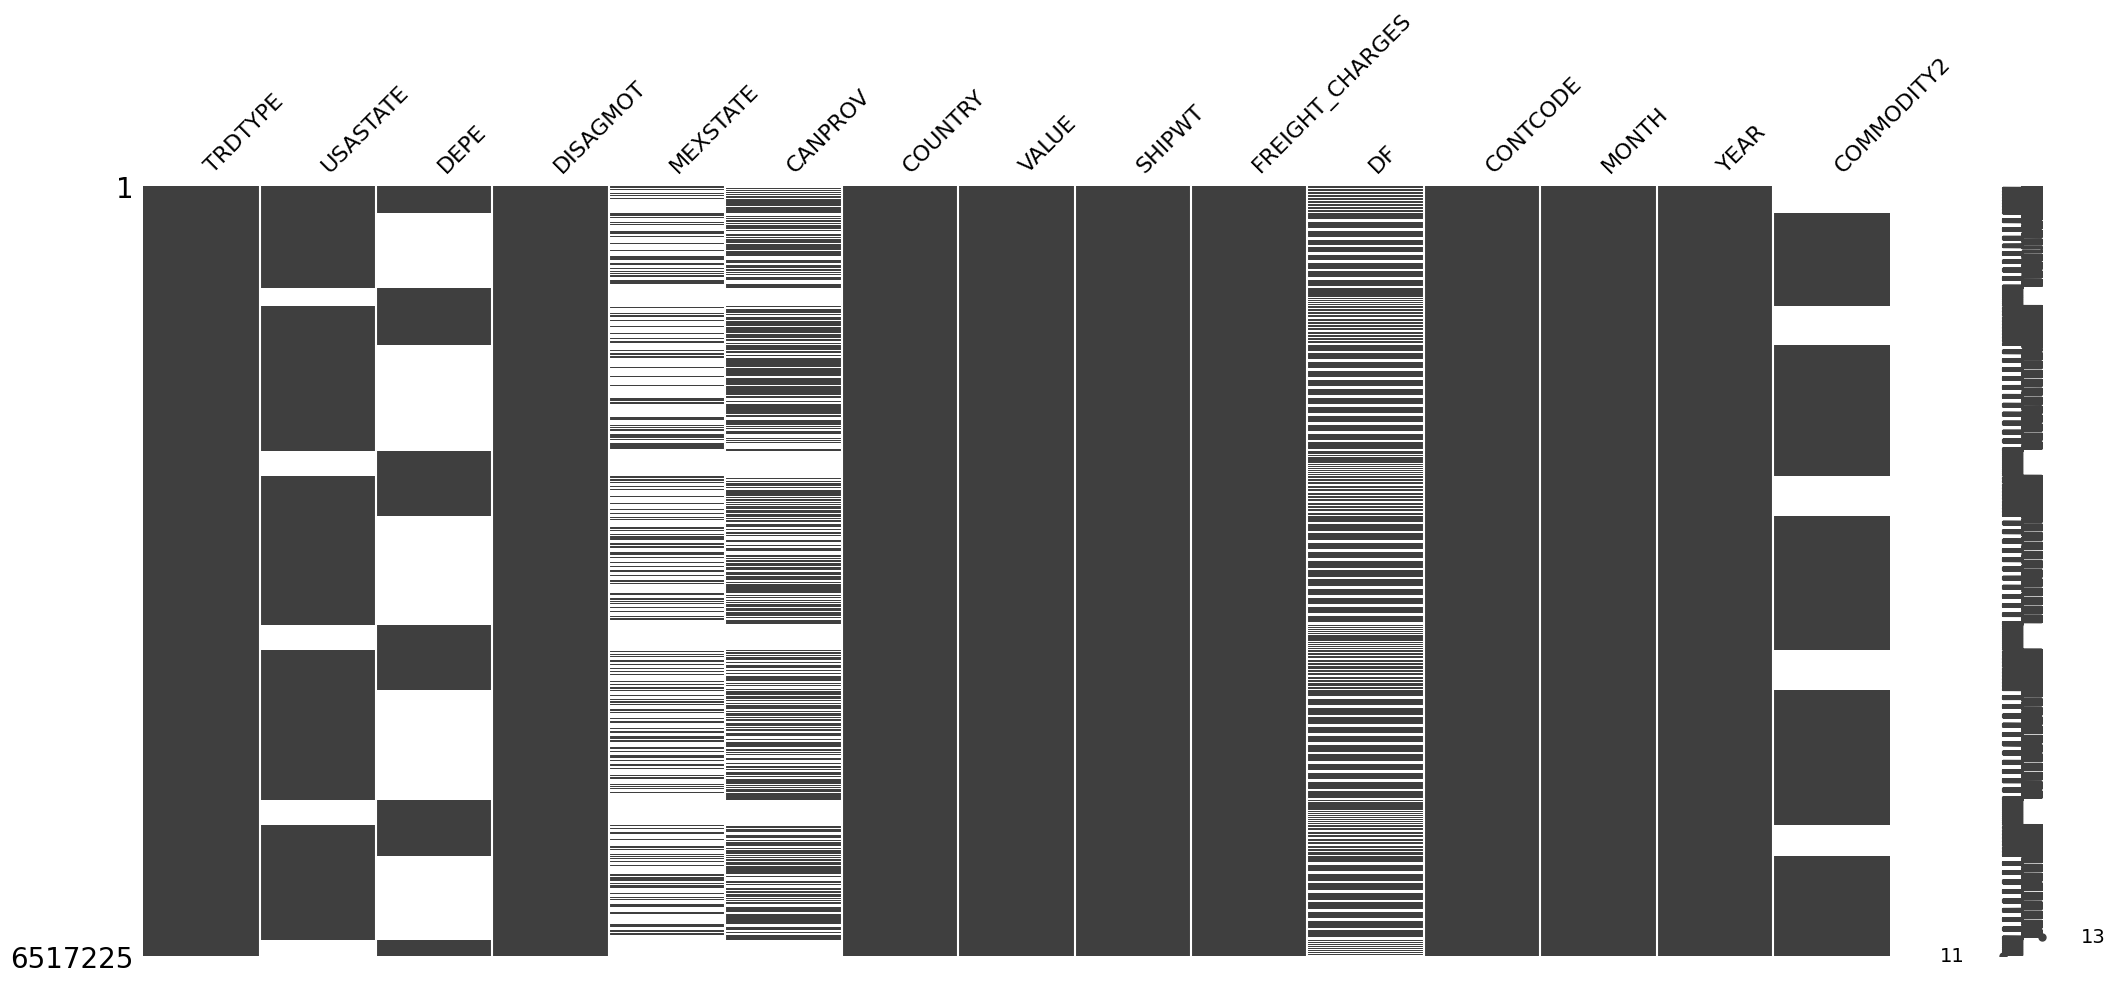

In [21]:
import missingno as msno

# Matrix Visual overview
print("Matrix Chart for the Missing Values")
msno.matrix(final_df)

<Axes: >

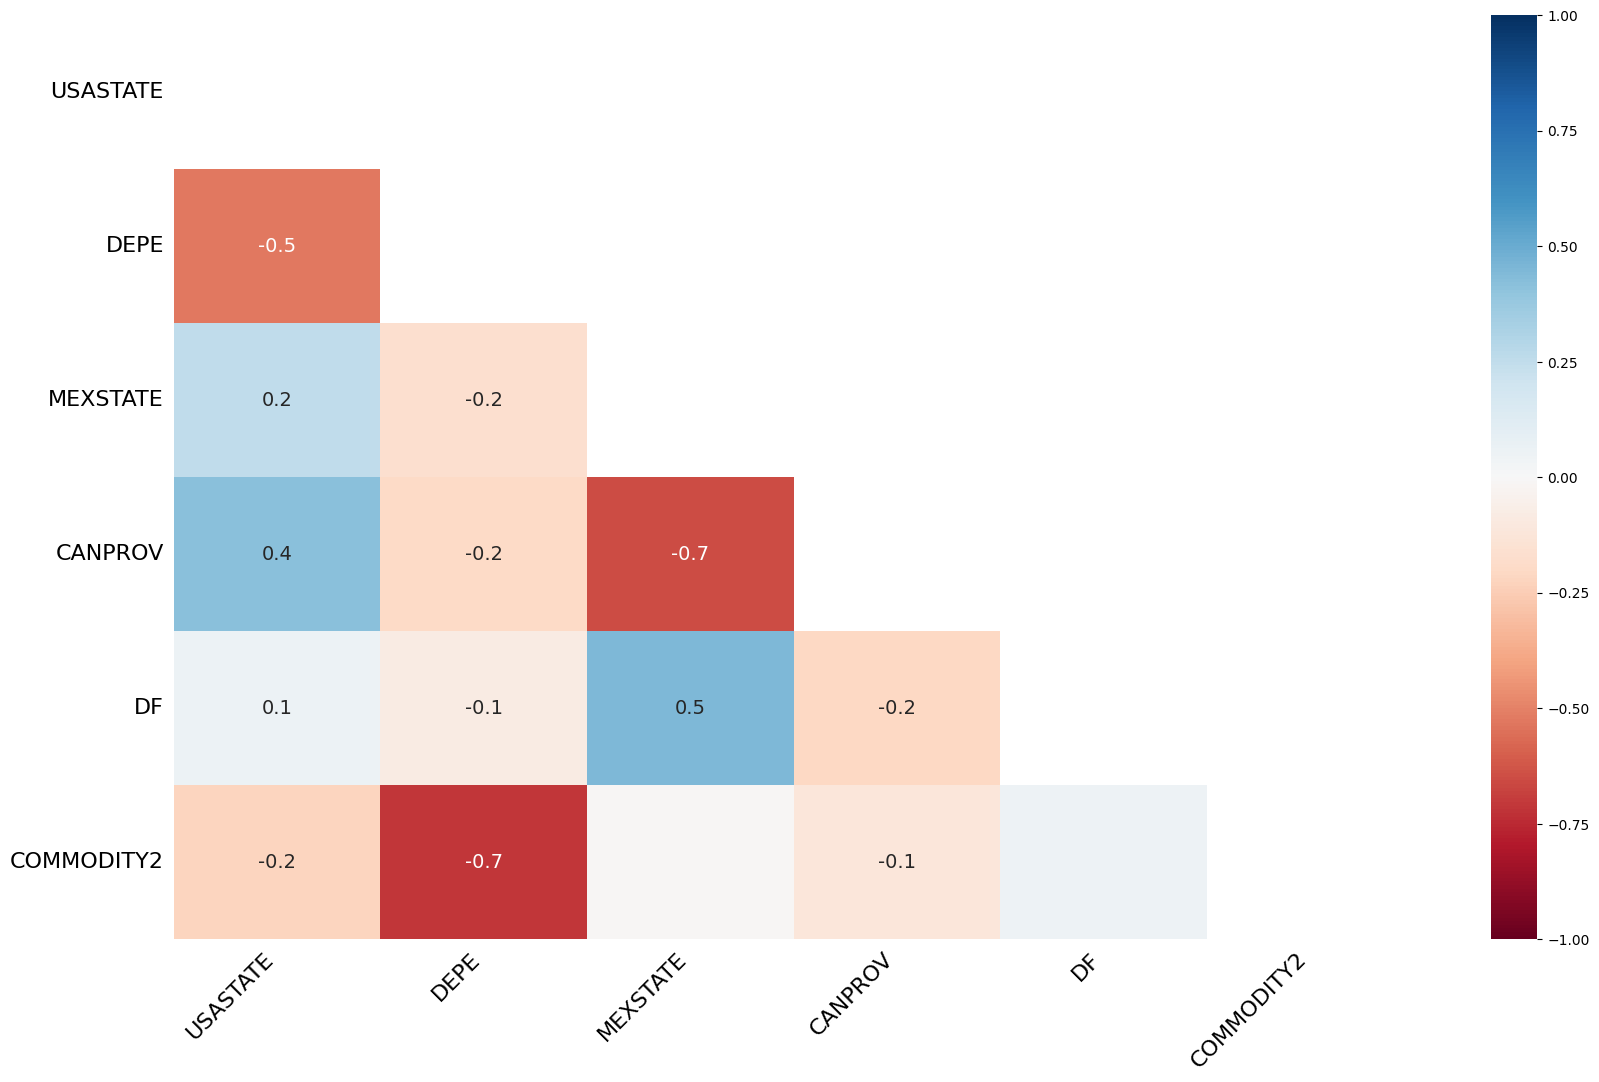


HeatMap for the Missing Values


In [22]:
# Heatmap to see correlations of missingness
print("\nHeatMap for the Missing Values")
msno.heatmap(final_df)


Dendrogram for the Missing Values


<Axes: >

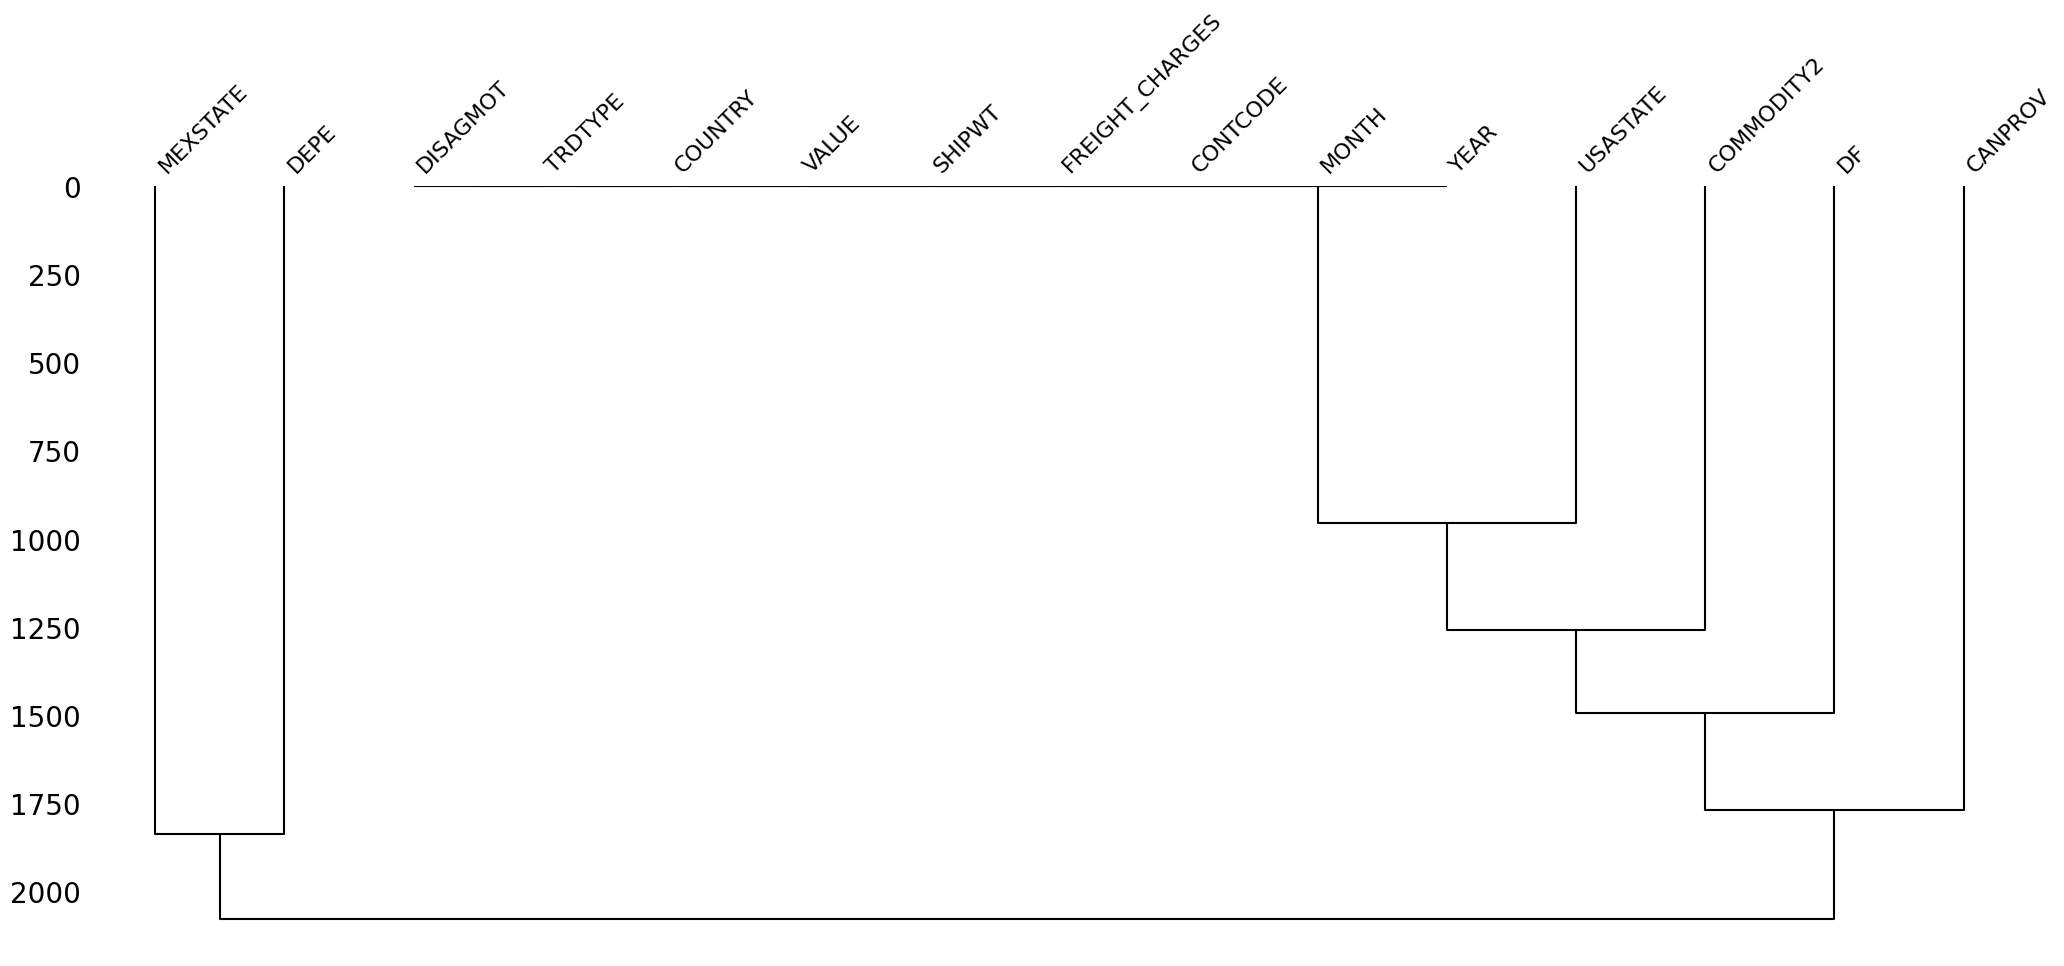

In [23]:
#Dendogram diagram for the missing values
print("\nDendrogram for the Missing Values")
msno.dendrogram(final_df)


Bar Chart for the Missing Values


<Axes: >

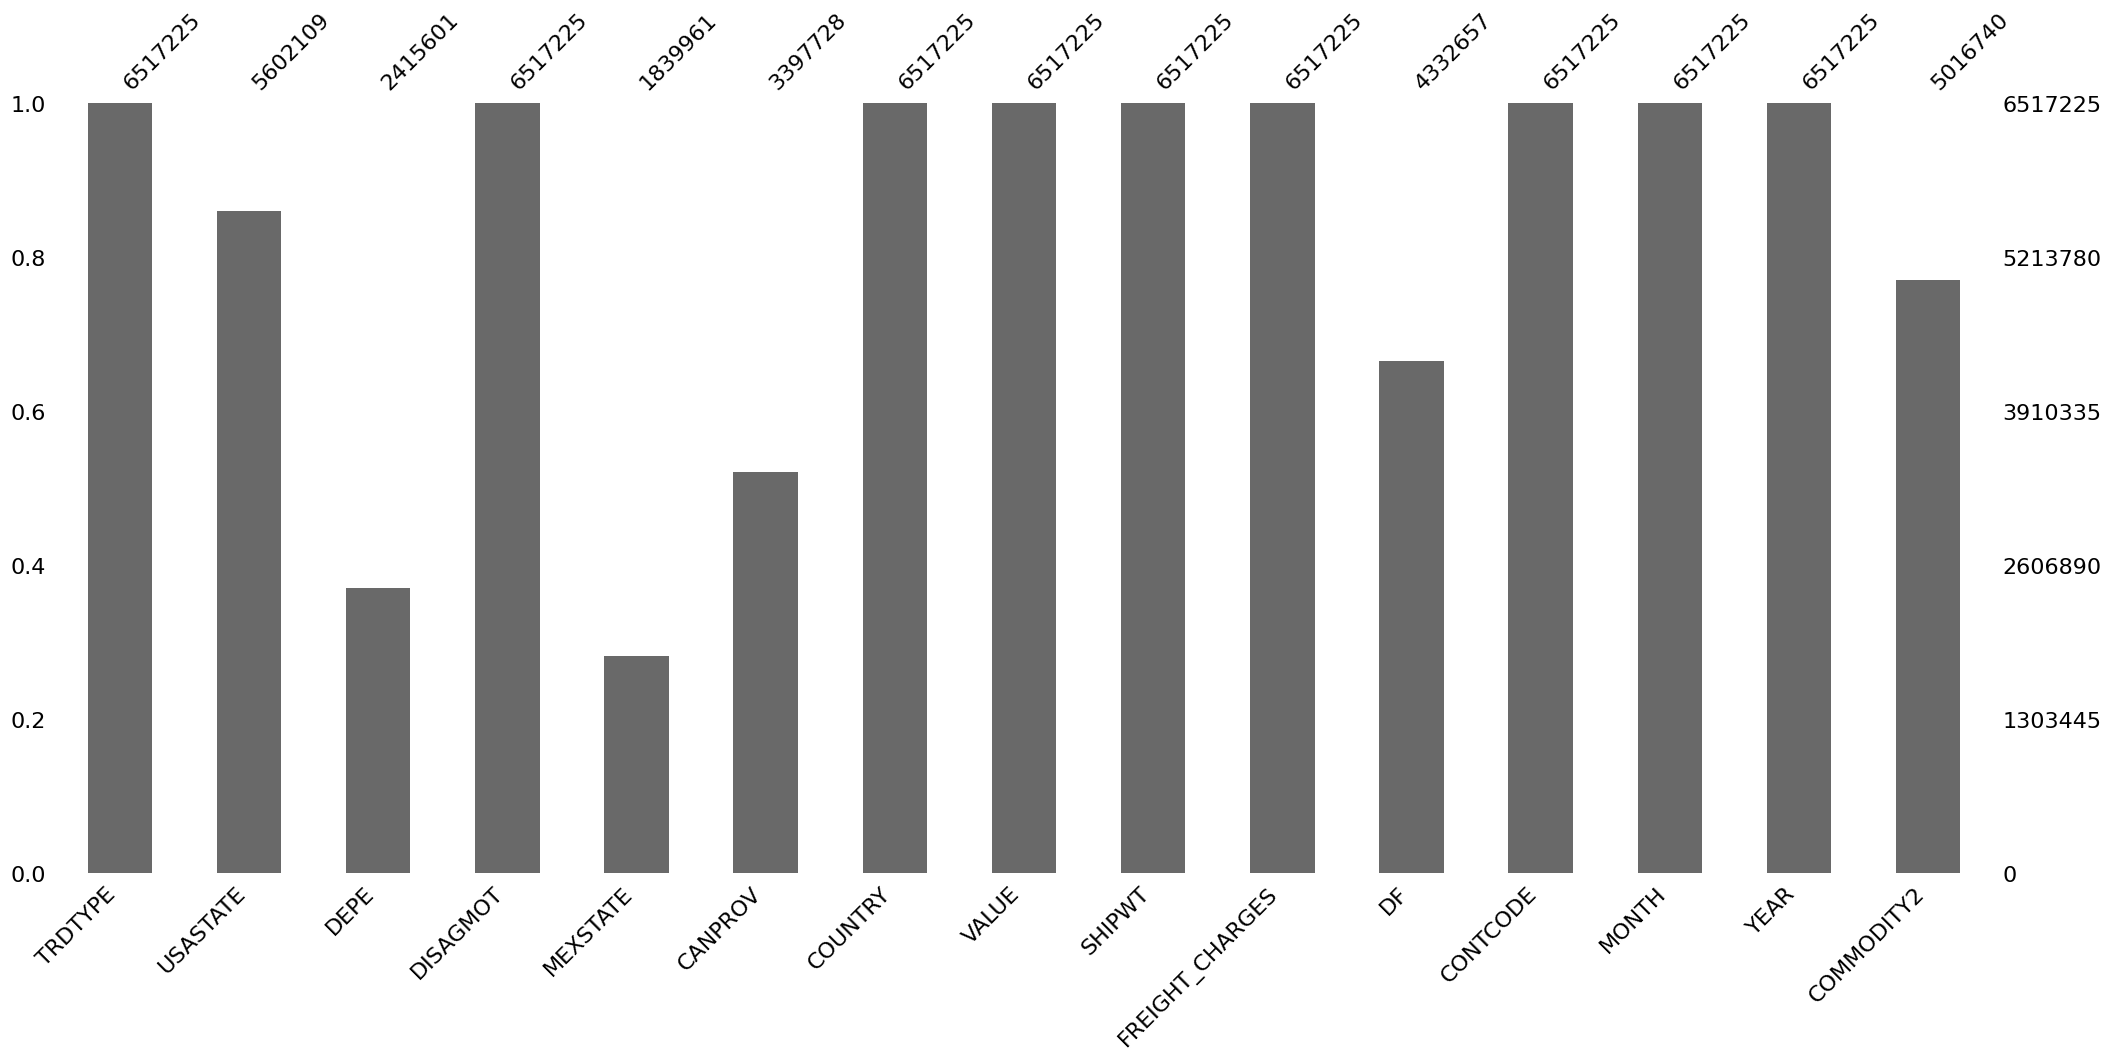

In [24]:
#Barchat for the missing values
print("\nBar Chart for the Missing Values")
msno.bar(final_df)